<a href="https://colab.research.google.com/github/tanisha1234-sys/PRE-TRAINED-MODEL/blob/main/pretrained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


TOPSIS Analysis Results:
                     Model  TOPSIS Score
Universal Sentence Encoder      0.901476
                     SBERT      0.742286
                    SimCSE      0.314117
                 BERT-base      0.212538
                   RoBERTa      0.135706

Criteria Matrix:
                            Accuracy  Inference Speed (ms)  Model Size (MB)  \
BERT-base                       0.85                  75.0            440.0   
RoBERTa                         0.87                  82.0            480.0   
SBERT                           0.84                  45.0            380.0   
Universal Sentence Encoder      0.82                  35.0            320.0   
SimCSE                          0.86                  70.0            420.0   

                            Training Cost  Maintenance  
BERT-base                             8.0          7.0  
RoBERTa                               9.0          7.0  
SBERT                                 6.0          8.0  
Univers

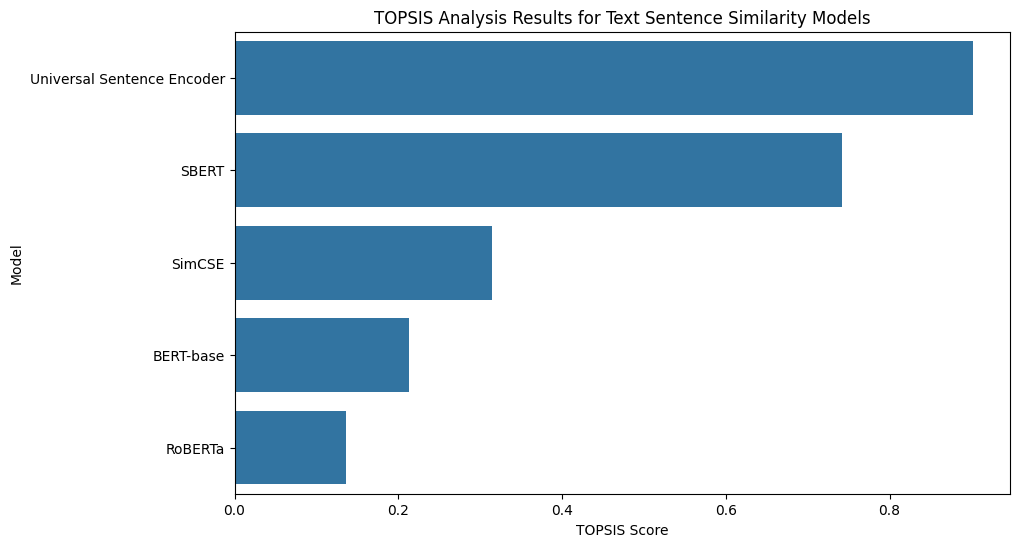

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# taken sample values for refernce
models = {
    'BERT-base': {
        'accuracy': 0.85,
        'inference_speed': 75,
        'model_size': 440,
        'training_cost': 8,
        'maintenance': 7
    },
    'RoBERTa': {
        'accuracy': 0.87,
        'inference_speed': 82,
        'model_size': 480,
        'training_cost': 9,
        'maintenance': 7
    },
    'SBERT': {
        'accuracy': 0.84,
        'inference_speed': 45,
        'model_size': 380,
        'training_cost': 6,
        'maintenance': 8
    },
    'Universal Sentence Encoder': {
        'accuracy': 0.82,
        'inference_speed': 35,
        'model_size': 320,
        'training_cost': 5,
        'maintenance': 9
    },
    'SimCSE': {
        'accuracy': 0.86,
        'inference_speed': 70,
        'model_size': 420,
        'training_cost': 7,
        'maintenance': 6
    }
}

def perform_topsis(data, weights, criteria_type):
    """
    Perform TOPSIS analysis
    weights: list of weights for each criterion
    criteria_type: list of '+' for benefit criteria and '-' for cost criteria
    """

    decision_matrix = np.array([[v for v in model.values()] for model in data.values()])

    normalized = decision_matrix / np.sqrt(np.sum(decision_matrix**2, axis=0))


    weighted_normalized = normalized * weights

    ideal_best = np.array([max(col) if ctype == '+' else min(col)
                          for col, ctype in zip(weighted_normalized.T, criteria_type)])
    ideal_worst = np.array([min(col) if ctype == '+' else max(col)
                           for col, ctype in zip(weighted_normalized.T, criteria_type)])

    s_best = np.sqrt(np.sum((weighted_normalized - ideal_best)**2, axis=1))
    s_worst = np.sqrt(np.sum((weighted_normalized - ideal_worst)**2, axis=1))

    closeness = s_worst / (s_best + s_worst)

    return closeness

weights = [0.35, 0.20, 0.15, 0.15, 0.15]
criteria_type = ['+', '-', '-', '-', '+']


results = perform_topsis(models, weights, criteria_type)


df_results = pd.DataFrame({
    'Model': list(models.keys()),
    'TOPSIS Score': results
})
df_results = df_results.sort_values('TOPSIS Score', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='TOPSIS Score', y='Model', data=df_results)
plt.title('TOPSIS Analysis Results for Text Sentence Similarity Models')
plt.xlabel('TOPSIS Score')
plt.ylabel('Model')

print("\nTOPSIS Analysis Results:")
print(df_results.to_string(index=False))

criteria_matrix = pd.DataFrame(models).T
criteria_matrix.columns = ['Accuracy', 'Inference Speed (ms)', 'Model Size (MB)',
                         'Training Cost', 'Maintenance']
print("\nCriteria Matrix:")
print(criteria_matrix)